In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\abhin\OneDrive\Documents\code\ML\Udemy\data\Algerian_forest_fires_cleaned_dataset.csv")

In [4]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df = df.drop(columns=['day','month','year'])

<h3 color = 'red'>Feature Selection

In [7]:
#independent and dependent features
X = df.drop(columns = ['FWI'])
y = df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

<Axes: >

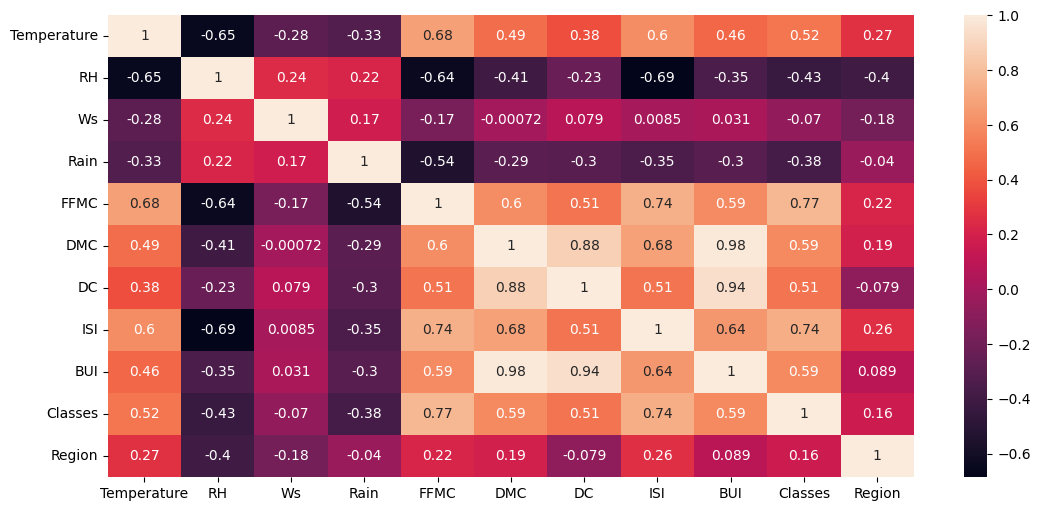

In [14]:
plt.figure(figsize=(13, 6))
sns.heatmap(X.corr(),annot=True)

In [15]:
#function to remove highly correlated independent features
# as it would be redundant.

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: #takes care of both highly pos and neg correlation(abs)
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
#threshold 85 set by domain expert
correlation(X,0.85)

{'BUI', 'DC'}

In [18]:
X.drop(columns=['BUI', 'DC'],inplace=True)

In [19]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [24]:
from sklearn.preprocessing import StandardScaler

#Standaridize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

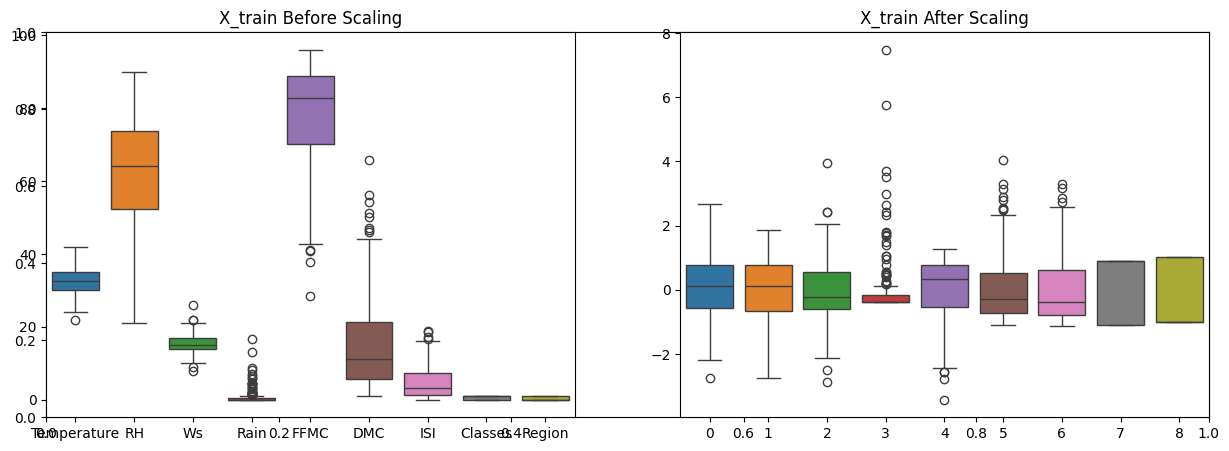

In [25]:
#outliers looks and see standard how it looks by
#box plots
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

<span style="color: orange;"><h2>Linear Regression</h2></span>

Mean absolute error 0.546823646524997
R2 accuracy 0.9847657384266951


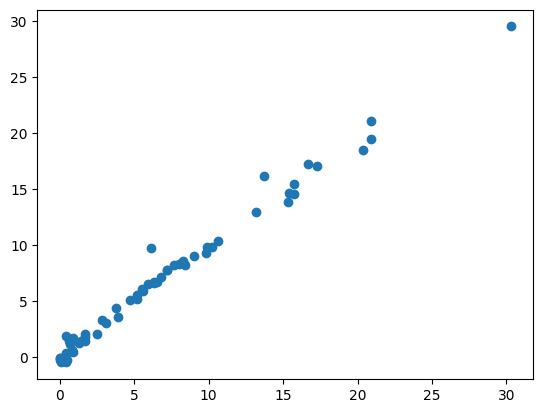

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)
plt.scatter(y_test,y_pred)

Mean absolute error 1.133175994914409
R2 accuracy 0.9492020263112388


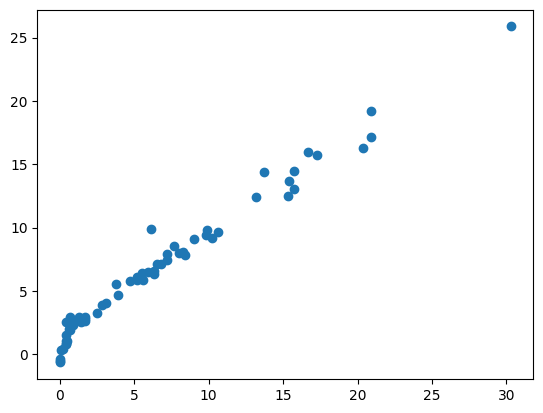

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg = Lasso()
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg = LassoCV(cv=5)#k fold cv
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)

Mean absolute error 0.6199701158263431
R2 accuracy 0.9820946715928275


Mean absolute error 0.5642305340105691
R2 accuracy 0.9842993364555513


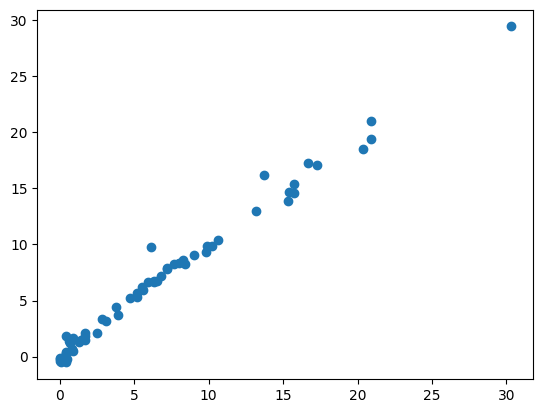

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)
plt.scatter(y_test,y_pred)

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg = RidgeCV(cv=5)#k fold cv
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)

Mean absolute error 0.5642305340105691
R2 accuracy 0.9842993364555513


In [36]:
#see the lambda/alpha values:
lin_reg.alpha_

np.float64(1.0)

In [38]:
lin_reg.alphas


(0.1, 1.0, 10.0)

Mean absolute error 1.8822353634896
R2 accuracy 0.8753460589519703


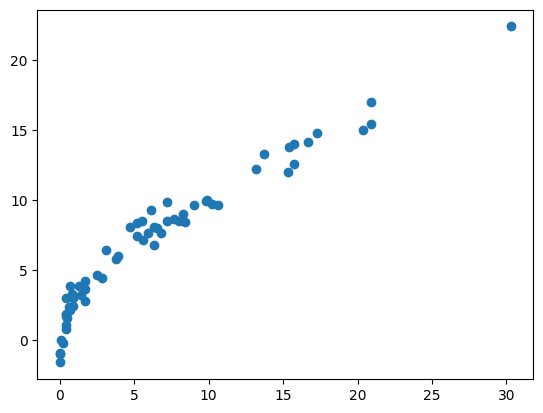

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
lin_reg = ElasticNet()
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6575946731430901
R2 accuracy 0.9814217587854941


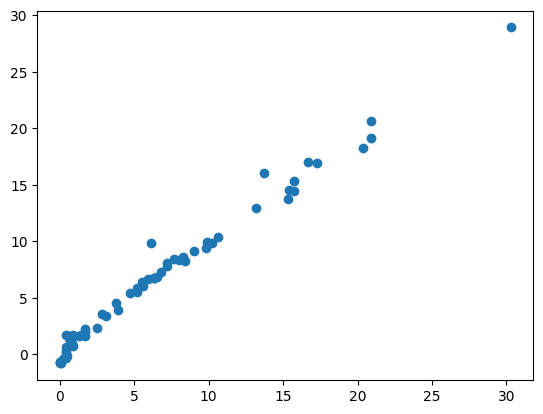

In [39]:

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNetCV
lin_reg = ElasticNetCV()
lin_reg.fit(X_train_scaled,y_train)#scale only inputs not outputs
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 accuracy", r2)
plt.scatter(y_test,y_pred)

In [40]:
#ALPHA SELECTED
lin_reg.alpha_

np.float64(0.04311146156383891)

In [ ]:
#all the 100 alphas tested with
lin_reg.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
'''scaler.pkl contains the fitted StandardScaler object,
 which stores the mean and standard deviation of your training data.
   You must use this exact scaler to transform any new input data in 
   the same way as during training, ensuring consistency and preventing
     data leakage or distribution mismatch.

ridge.pkl contains your trained Ridge regression model,
 which expects input data to be scaled in the same way as 
 during training.'''

'scaler.pkl contains the fitted StandardScaler object, which stores the mean and standard deviation of your training data. You must use this exact scaler to transform any new input data in the same way as during training, ensuring consistency and preventing data leakage or distribution mismatch.\n\nridge.pkl contains your trained Ridge regression model, which expects input data to be scaled in the same way as during training.'